In [3]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np

(400, 600, 3)
<class 'numpy.ndarray'>


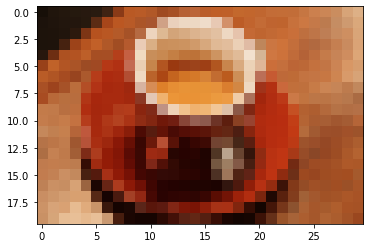

In [24]:
"""
    Sampling image by using the method of finding the mean

    ratio为采样间隔。采样间隔越大，所得图像的像素数越少，空间分辨率低，图像质量差；采样间隔越小，所得图像像素越多，空间分布率高，图像质量好，数据量大。
"""
# load test image
image = data.coffee()
# print(image)
# plt.imshow(image)
# plt.show()
# display the original shape of the image
print(image.shape)
# display the type of the image
print(type(image))
# set sampling rate
ratio = 20
# set the shape of the image after sampling
image1 = np.zeros((int(image.shape[0] / ratio), int(image.shape[1] / ratio),image.shape[2]), dtype="int32")
# lterate over the image
for i in range(image1.shape[0]):
    for j in range(image1.shape[1]):
        for k in range(image1.shape[2]):
            # get the image block that needs to be sampled
            delta = image[i*ratio:(i+1)*ratio, j*ratio:(j+1)*ratio,k]
            # calculate the mean and put it in the result image
            image1[i, j, k] = np.mean(delta)
            pass
        pass
    pass
# print the image after sampling
plt.imshow(image1)
plt.show()

(400, 600, 3)
<class 'numpy.ndarray'>


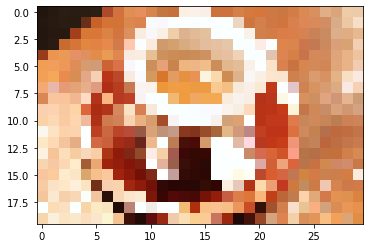

In [38]:
"""
    sampling the image by finding the maximum
"""
# load the test image
image = data.coffee()
# display the original shape of the image
print(image.shape)
# display the type of the image
print(type(image))
# set sampling rate
ratio = 20
# set the shape of the image after sampling
image1 = np.zeros((int(image.shape[0]/ratio), int(image.shape[1]/ratio), image.shape[2]), dtype="int32")
# lterate over the image
for i in range(image1.shape[0]):
    for j in range(image1.shape[1]):
        for k in range(image1.shape[2]):
            # get the image block that needs to be sampled
            delta = image[i*ratio:(i+1)*ratio, j*ratio:(j+1)*ratio, k]
            # calculate the maximum and put it in the result image
            image1[i, j, k] = np.max(delta)
            pass
        pass
    pass
# print the image after sampling
plt.imshow(image1)
plt.show()




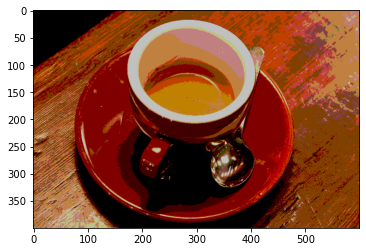

In [56]:
"""
    image quantization

    ratio = 128时，实质上是将原本256级灰度的图像二值化
    量化后的灰度级数 n = 256 / ratio
    图像的量化比率决定了图像的颜色精细程度，目前的一般做法是从图像响应最大值到最小值均匀量化，划分为若干个量化层级。除了均匀量化方法外，还存在非均匀量化，即在灰度级变化剧烈区域细粒度量化，平滑区域粗粒度量化。
    量化等级越多，所得图像层次越丰富，灰度分辨率高，图像质量好，数据量大；量化等级越少，图像层次欠丰富，灰度分辨率低，可能出现假轮廓现象，图像质量变差，数据量较小。
    极少数情况下固定图像大小，减少灰度级能改善质量，产生这种情况的可能原因是减少灰度级一般会增加图像对比度。例如对细节丰富的图像数字化，可能会减少图像中用户不感兴趣的细节，增加感兴趣区域与背景图像对比度。
"""
# load the test image
image = data.coffee()
# print(image)
# set sampling rate
ratio = 64
# lterate over the image
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        for k in range(image.shape[2]):
            # quantizate every pixel of the image
            image[i, j, k] = int(image[i, j, k]/ratio)*ratio
            pass
        pass
    pass
# print the image after quantization
# print(image)
plt.imshow(image)
plt.show()

In [1]:
"""
    read image
"""
from skimage import io

# define file path
file_name = "/images/2.jpg"
# read the image into the array image
image = io.imread(fname=file_name)

print(image.shape)
plt.imshow(image)
plt.show()

FileNotFoundError: No such file: 'd:\images\2.jpg'

2
3
[2 3 4]
2
4
[[3]]


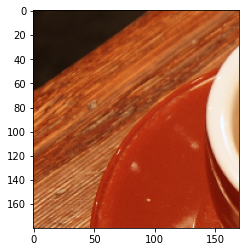

In [71]:
"""
    the index operation
"""
array = np.array([2, 3, 4, 5, 6])
print(array[0])
print(array[1])

print(array[0:3])

array2 = np.array(
    [[1, 2, 3],
    [2, 3, 4],
    [4, 5, 6]]
)
print(array2[1, 0])
print(array2[1, 2])
print(array2[1:2,1:2])

image = data.coffee()
image1 = image[20:200, 30:200, :]
plt.imshow(image1)
plt.show()

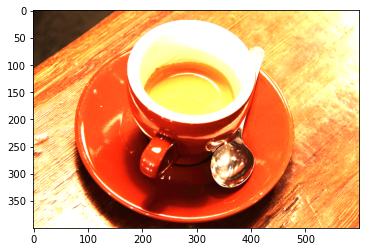

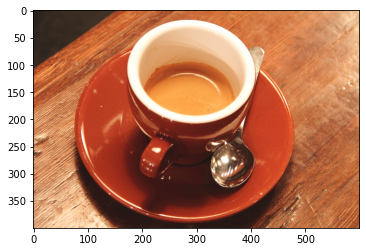

In [77]:
"""
    contrast manipulation
"""
def change_alpha(im, a, b):
    im_changed = np.zeros(shape=im.shape, dtype="uint8")
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            for k in range(im.shape[2]):
                if im[i, j, k]*a + b > 255:
                    im_changed[i, j, k] = 255
                elif im[i, j, k]*a + b < 0:
                    im_changed[i, j, k] = 0
                else:
                    im_changed[i, j, k] = im[i, j, k]*a + b
    return im_changed

image = data.coffee()
# a effect the constrast of the image
image1 = change_alpha(image, 2, 0)
# b effect the luminance of the image
image2 = change_alpha(image, 1, 20)
plt.imshow(image1)
plt.show()
plt.imshow(image2)
plt.show()

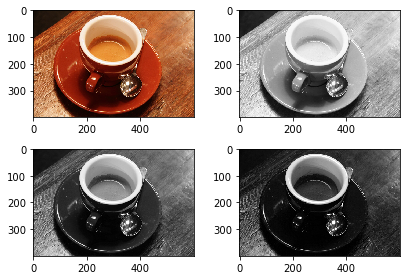

In [4]:
"""
    color channel operation
"""
image = data.coffee()

image_r = image[:,:,0]
image_g = image[:,:,1]
image_b = image[:,:,2]

plt.subplot(2,2,1)
io.imshow(image)
plt.subplot(2,2,2)
io.imshow(image_r)
plt.subplot(2,2,3)
io.imshow(image_g)
plt.subplot(2,2,4)
io.imshow(image_b)
plt.show()

# image[:,:,0] = image_b
# image[:,:,2] = image_r

# plt.imshow(image)
# plt.show()

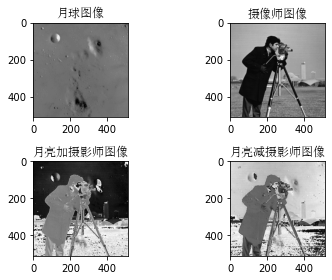

In [5]:
"""
    Numerical and logical operations
"""
from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname=r"c:\\windows\\fonts\\simsun.ttc", size=12)
moon = data.moon()
camera = data.camera()
image_minus = moon - camera
image_plus = moon + camera
plt.set_cmap(cmap='gray')
plt.subplot(2,2,1)
plt.title('月球图像', fontproperties=font_set)
plt.imshow(moon)
plt.subplot(2,2,2)
plt.title('摄像师图像', fontproperties=font_set)
plt.imshow(camera)
plt.subplot(2,2,3)
plt.title('月亮加摄影师图像', fontproperties=font_set)
plt.imshow(image_plus)
plt.subplot(2,2,4)
plt.title('月亮减摄影师图像', fontproperties=font_set)
plt.imshow(image_minus)
plt.tight_layout()
plt.show()

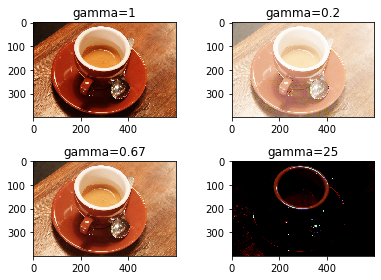

In [89]:
"""
    point operation

    exposure.adjust_gamma : 幂次变换函数
"""
from skimage import exposure
image = data.coffee()
image_1 = exposure.adjust_gamma(image, 0.2)
image_2 = exposure.adjust_gamma(image, 0.67)
image_3 = exposure.adjust_gamma(image, 25)

plt.subplot(2,2,1)
plt.title('gamma=1')
io.imshow(image)
plt.subplot(2,2,2)
plt.title('gamma=0.2')
io.imshow(image_1)
plt.subplot(2,2,3)
plt.title('gamma=0.67')
io.imshow(image_2)
plt.subplot(2,2,4)
plt.title('gamma=25')
io.imshow(image_3)
plt.show()

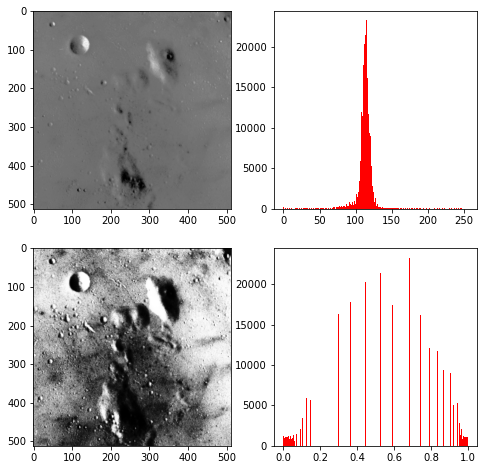

In [100]:
"""
    image histogram

    flatten : Return a copy of the array collapsed into one dimension.
    plt.cm.gray : 灰度映射
"""
image = data.coffee()

hist_r = exposure.histogram(image[:,:,0], nbins=256)
hist_g = exposure.histogram(image[:,:,1], nbins=256)
hist_b = exposure.histogram(image[:,:,2], nbins=256)

# print(help(exposure.histogram))

img = data.moon()
# set the name and figsize of the figure
plt.figure("hist", figsize=(8,8))
arr = img.flatten()
plt.subplot(221)
plt.imshow(img, plt.cm.gray)
plt.subplot(222)
# print histogram
plt.hist(arr, bins=256, edgecolor='None', facecolor='red')
img1=exposure.equalize_hist(img)
arr1=img1.flatten()
plt.subplot(223)
plt.imshow(img1,plt.cm.gray)
plt.subplot(224)
plt.hist(arr1, bins=256, edgecolor='None', facecolor='red')
plt.show()

In [103]:
"""
    image convolution operation
"""
def matrix_conv(arr, kernel):
    n = len(kernel)
    ans = 0
    for i in range(n):
        for j in range(n):
            ans += arr[i,j]*float(kernel[i,j])
            pass
        pass
    return ans

def conv2d(img, kernel):
    n = len(kernel)
    img1 = np.zeros((img.shape[0]+2*(n-1), img.shape[i]+2*(n-1)))
    img1[(n-1):(n+img.shape[0]-1), (n-1):(n+img.shape[1]-1)] = img
    img2 = np.zeros((img1.shape[0]-n+1, img1.shape[1]-n+1))
    for i in range(img1, shape[0]-n+1):
        for j in range(img1.shape[1]-n+1):
            temp = img1[i:i+n, j:j+n]
            img2[i, j] = matrix_conv(temp, kernel)
    new_img = img2[(n-1):(n+img.shape[0]-1),(n-1):(n+img.shape[1]-1)]
    return new_img

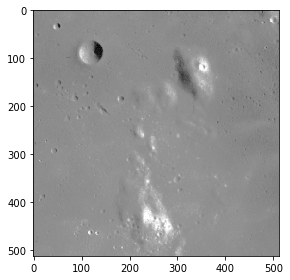

In [109]:
"""
    尝试使用python实现灰度图像的反色运算
"""
img = data.moon()
img1 = 255 - img
io.imshow(img1)
plt.show()

In [112]:
"""
    对数变换处理主要用于两个方向：
    1.增强图像中比较暗的部分，从而用来扩展被压缩的高值图像中的较暗像素。
    2.广泛用于频谱图像显示。傅里叶变换的频谱动态范围可能宽达0-10的六次方，直接显示频谱时，图像显示设备的动态范围往往不能满足要求，从而丢失大量的暗部细节。
"""
print(dir(exposure))
print(help(exposure.adjust_log))

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_adapthist', 'adjust_gamma', 'adjust_log', 'adjust_sigmoid', 'cumulative_distribution', 'equalize_adapthist', 'equalize_hist', 'exposure', 'histogram', 'histogram_matching', 'is_low_contrast', 'match_histograms', 'rescale_intensity']
Help on function adjust_log in module skimage.exposure.exposure:

adjust_log(image, gain=1, inv=False)
    Performs Logarithmic correction on the input image.
    
    This function transforms the input image pixelwise according to the
    equation ``O = gain*log(1 + I)`` after scaling each pixel to the range 0 to 1.
    For inverse logarithmic correction, the equation is ``O = gain*(2**I - 1)``.
    
    Parameters
    ----------
    image : ndarray
        Input image.
    gain : float, optional
        The constant multiplier. Default value is 1.
    inv : float, optional
        If True, it performs inverse logarithmic corr